In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드

In [2]:
patient = pd.read_csv('/project/data/PATIENTS.csv')
lab = pd.read_csv('/project/data/LABEVENTS.csv', usecols = ['ROW_ID','SUBJECT_ID','HADM_ID','ITEMID','CHARTTIME','FLAG'])

#D_ICD_DIAGNOSES
diagnoses = pd.read_csv('/project/data/D_ICD_DIAGNOSES.csv')
#DIAGNOSES_ICD
diagnoses_icd = pd.read_csv('/project/data/DIAGNOSES_ICD.csv')

In [3]:
lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,abnormal
...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,NaN


In [5]:
diagnoses_icd

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [12]:
#폐와 관련된 질병 추출
diag_pneum = diagnoses[(diagnoses['SHORT_TITLE'].str.contains('pneum')|(diagnoses['SHORT_TITLE'].str.contains('Pneum')))]
diag_pneum.shape

(95, 4)

In [13]:
diagnoses

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V7399,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V740,Screening for cholera,Screening examination for cholera
14564,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V742,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [14]:
#확인
diagnoses[(diagnoses['ICD9_CODE'] == '486')|(diagnoses['ICD9_CODE'] == '5070')|(diagnoses['ICD9_CODE'] == '48241')]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
5129,5509,48241,Meth sus pneum d/t Staph,Methicillin susceptible pneumonia due to Staph...
5147,5528,486,"Pneumonia, organism NOS","Pneumonia, organism unspecified"
5407,5136,5070,Food/vomit pneumonitis,Pneumonitis due to inhalation of food or vomitus


In [15]:
# 폐와 관련된 질병의 value_counts - 가장 많은 코드 486, 5070, 48241만 사용하기로 함
pneum_id = diagnoses_icd[diagnoses_icd['ICD9_CODE'].isin(diag_pneum['ICD9_CODE'])].reset_index()
pneum_id['ICD9_CODE'].value_counts()

486      4839
5070     3680
48241     789
5121      786
99731     564
         ... 
3523        1
4843        1
5671        1
4957        1
11505       1
Name: ICD9_CODE, Length: 63, dtype: int64

In [16]:
diag_pneum

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
8795,8584,8604,Traum pneumohemothor-cl,Traumatic pneumohemothorax without mention of ...
8796,8585,8605,Traum pneumohemothor-opn,Traumatic pneumohemothorax with open wound int...
11751,12367,99731,Ventltr assoc pneumonia,Ventilator associated pneumonia
13212,12185,V0382,Nd vac strptcs pneumni b,Other specified vaccinations against streptoco...


In [17]:
#환자 테이블에서 폐렴환자 추출하기
pneum_sub = pneum_id['SUBJECT_ID']
print(patient.shape)
patient[patient['SUBJECT_ID'].isin(pneum_sub)]

(46520, 8)


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
17,251,268,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1
18,252,269,M,2130-09-30 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46488,31813,43982,F,2065-04-17 00:00:00,NaN,NaN,NaN,0
46494,31819,44002,F,2072-08-10 00:00:00,NaN,NaN,NaN,0
46507,31832,44064,M,2115-11-18 00:00:00,NaN,NaN,NaN,0
46511,31836,44073,F,2086-03-29 00:00:00,NaN,NaN,NaN,0


In [44]:
patient['SUBJECT_ID'].nunique()

46520

In [3]:
plt.rcParams['font.family']

['Arial']

In [8]:
46520-7799

38721

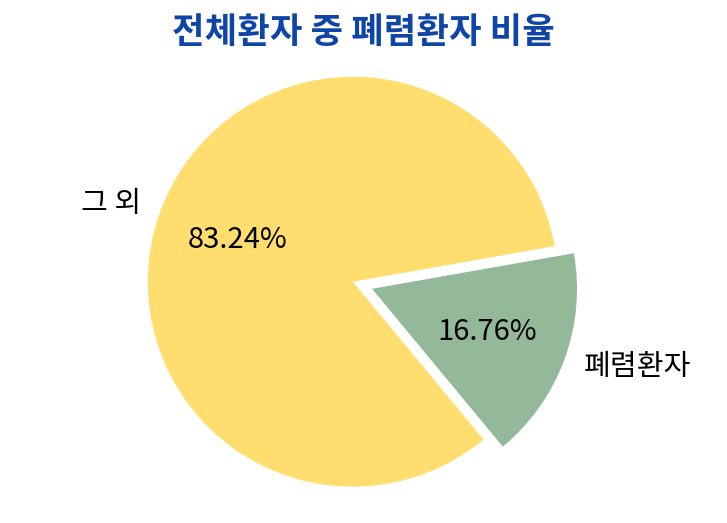

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
# plt.rcParams['font.family'] = 'Wide' 
# information of groups

group_names = ['그 외', '폐렴환자']

group_sizes = [46520-7799, 7799]

group_colors = ['#ffdd6e','#93b89a']

group_explodes = (0.1, 0) # explode 1st slice




# Pie chart
plt.figure(dpi=150)
plt.pie(group_sizes, 

        explode=group_explodes, 

        labels=group_names, 

        colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

#         shadow=True, 

        startangle=10,

        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('전체환자 중 폐렴환자 비율', fontsize=17, color='#0f45a8',fontweight='bold')

plt.show()
plt.savefig('폐렴환자비율.png', bbox_inches='tight', dpi=200)

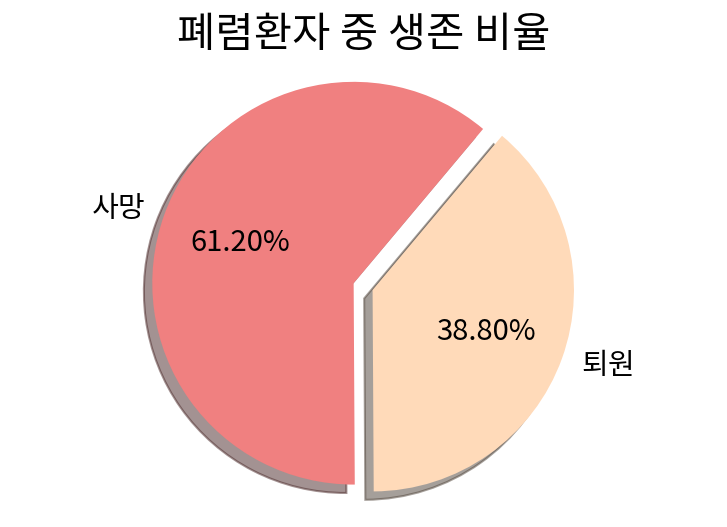

<Figure size 432x288 with 0 Axes>

In [103]:
group_names = ['사망', '퇴원']

group_sizes = [0.612, 0.388]

group_colors = ['lightcoral', 'peachpuff']

group_explodes = (0.1, 0) # explode 1st slice




# Pie chart
plt.figure(dpi=150)
plt.pie(group_sizes, 

        explode=group_explodes, 

        labels=group_names, 

        colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

        shadow=True, 

        startangle=50,

        textprops={'fontsize': 14}, ) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('폐렴환자 중 생존 비율', fontsize=20)

plt.show()
plt.savefig('폐렴환자_생존비율.png', dpi=200)

In [22]:
pneum_id

,index,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1,1298,109,172335,2.0,486
1,38,1498,114,178393,3.0,48283
2,57,1517,115,114585,16.0,0413
3,82,1542,117,164853,11.0,486
4,116,1576,124,112906,2.0,486
...,...,...,...,...,...,...
14154,650638,631748,95816,122432,3.0,486
14155,650672,632562,96004,141589,1.0,486
14156,650740,632630,96015,166722,2.0,4821
14157,650873,638381,97144,109999,9.0,4821


In [7]:
#[:3] 정확한 병명 확인
diagnoses[diagnoses['ICD9_CODE'].isin(pneum_id['ICD9_CODE'].value_counts()[:3].index)]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
5129,5509,48241,Meth sus pneum d/t Staph,Methicillin susceptible pneumonia due to Staph...
5147,5528,486,"Pneumonia, organism NOS","Pneumonia, organism unspecified"
5407,5136,5070,Food/vomit pneumonitis,Pneumonitis due to inhalation of food or vomitus


In [18]:
#[:3]의 Diagnoses_icd 데이터 추출
pneum = pneum_id[(pneum_id['ICD9_CODE'].isin(pneum_id['ICD9_CODE'].value_counts()[:3].index))].drop(['index','ROW_ID','SEQ_NUM'],axis=1).reset_index(drop=True)
pneum

,SUBJECT_ID,HADM_ID,ICD9_CODE
0,109,172335,486
1,117,164853,486
2,124,112906,486
3,124,138376,486
4,136,184644,486
...,...,...,...
9303,95555,103704,486
9304,95561,121289,486
9305,95816,122432,5070
9306,95816,122432,486


In [19]:
# 환자의 id만 추출하여 환자id에 저장, 총 예측에 사용할 환자 수 확인
환자id = pneum['SUBJECT_ID'].unique()
len(환자id)

7807

In [20]:
# 추출한 환자id로 환자의 사망,생존 분포 확인
patient[patient['SUBJECT_ID'].isin(환자id)]['EXPIRE_FLAG'].value_counts()

1    4777
0    3030
Name: EXPIRE_FLAG, dtype: int64

In [21]:
#추출한 환자id로 patient에서 정보 추출
환자 = patient[patient['SUBJECT_ID'].isin(환자id)]
환자

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
17,251,268,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1
18,252,269,M,2130-09-30 00:00:00,NaN,NaN,NaN,0
22,628,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,NaN,1
...,...,...,...,...,...,...,...,...
46476,31801,43932,M,2080-06-26 00:00:00,2153-03-01 00:00:00,NaN,2153-03-01 00:00:00,1
46477,31802,43937,M,2113-03-30 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,1
46482,31807,43959,F,2028-05-13 00:00:00,NaN,NaN,NaN,0
46488,31813,43982,F,2065-04-17 00:00:00,NaN,NaN,NaN,0


In [16]:
# 환자.to_csv('폐렴환자.csv', index=False)

# labevents에서 폐렴환자 추출 및 간단 EDA

In [23]:
# labevents에서 폐렴환자 id만을 추출하여 환자lab에 저장
환자lab = lab[lab['SUBJECT_ID'].isin(환자id)].reset_index(drop=True)
환자lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,FLAG
0,5144,9,150750.0,50819,2149-11-14 06:07:00,NaN
1,5145,9,150750.0,50820,2149-11-14 06:07:00,NaN
2,5146,9,150750.0,50821,2149-11-14 06:07:00,abnormal
3,5147,9,150750.0,50826,2149-11-14 06:07:00,NaN
4,5148,9,150750.0,50827,2149-11-14 06:07:00,NaN
...,...,...,...,...,...,...
9356344,27427231,96442,120151.0,51248,2115-06-29 04:45:00,NaN
9356345,27427232,96442,120151.0,51249,2115-06-29 04:45:00,NaN
9356346,27427233,96442,120151.0,51250,2115-06-29 04:45:00,NaN
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,abnormal


In [24]:
# value_counts()를 위해 결측치를 문자열 'nan' 으로 설정
환자lab['FLAG'] = 환자lab['FLAG'].fillna('nan')

In [25]:
환자lab['FLAG'].value_counts()

nan         5931403
abnormal    3406609
delta         18337
Name: FLAG, dtype: int64

In [26]:
# 환자lab.to_csv('폐렴환자lab.csv', index=False)

Text(0.5, 1.0, 'Pneumonia Labevent FLAG')

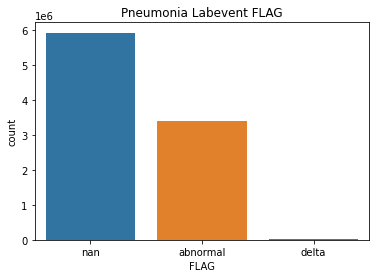

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(환자lab['FLAG'])
plt.title('Pneumonia Labevent FLAG')

In [17]:
# 전체 ITEMID의 개수 확인
환자lab['ITEMID'].nunique()

690

In [92]:
# abnormal인 환자별로 ITEMID 개수 확인
환자lab[환자lab['FLAG'].str.contains('abnormal')].groupby(['SUBJECT_ID'])['ITEMID'].count()

SUBJECT_ID
9        113
21       646
31       149
36       665
37        91
        ... 
99863    320
99934     47
99937     46
99944     90
99985    305
Name: ITEMID, Length: 7799, dtype: int64

In [19]:
#외래환자
list(set(환자id) - set(환자lab['SUBJECT_ID'].unique()))

[60961, 48968, 17674, 9388, 19097, 93114, 58012, 95230]

In [102]:
aa = pd.DataFrame(환자lab[환자lab['FLAG'].str.contains('abnormal')].groupby(['SUBJECT_ID'])['ITEMID'].count()).reset_index().sort_values("SUBJECT_ID")
aa[aa['SUBJECT_ID']==66876]

,SUBJECT_ID,ITEMID
6329,66876,830


In [ ]:
6329

In [98]:
aa['SUBJECT_ID'][6329]

66876

In [99]:
aa

,SUBJECT_ID,ITEMID
0,9,113
1,21,646
2,31,149
3,36,665
4,37,91
...,...,...
7794,99863,320
7795,99934,47
7796,99937,46
7797,99944,90
